# Python Grundlagen 20
## SciPy - Fortgeschrittene Anwendungen
***
In diesem Notebook wird behandelt:
- Digitale Signalverarbeitung mit `scipy.signal`
- Lineare Algebra mit `scipy.linalg`
- Statistische Berechnungen mit `scipy.stats`
- Mehrdimensionale Bildverarbeitung mit `scipy.ndimage`
***

#### Bevor wir anfangen können importiere bitte die folgenden Module:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Digitale Signalverarbeitung

Das Modul `scipy.signal` bietet umfangreiche Funktionen zur Signalverarbeitung, darunter Filter, Spektralanalyse und Signaltransformation. <br>

```python
# Beispiel: Generierung eines Signals mit mehreren Frequenzen
t = np.linspace(0, 1, 1000)
signal_rein = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*20*t)

# Hinzufügen von Rauschen
signal_verrauscht = signal_rein + np.random.normal(0, 0.5, t.shape)

# Butterworth-Tiefpassfilter
b, a = signal.butter(4, 15, 'low', fs=1000)
signal_gefiltert = signal.filtfilt(b, a, signal_verrauscht)
```

#### 1.1 Aufgaben:
> (a) Erstelle ein Signal, das aus drei Sinuswellen mit den Frequenzen 5 Hz, 50 Hz und 100 Hz besteht. Formel: `np.sin(2*pi*frequenz*numpy.array)`<br>
>
> (b) Berechne und plotte das Leistungsspektrum des Signals mit `signal.periodogram` für eine Spektralanalyse. <br>
>
> (c) Entwerfe einen Bandpassfilter, der nur die 50 Hz Komponente durchlässt und wende ihn auf das Signal aus (a) und das Leistungsspektrum aus (b) an. <br>
>
> (d) Erstelle eine Figure mit vier Subplots um die vier Ergebnisse miteinander zu vergleichen (Originalsignal, orig. Signal Leistungsspektrum, gefiltertes Originalsignal und gefiltertes Signal Leistungsspektrum).

In [2]:
from scipy import signal
# Deine Lösung:





#### Lösung:

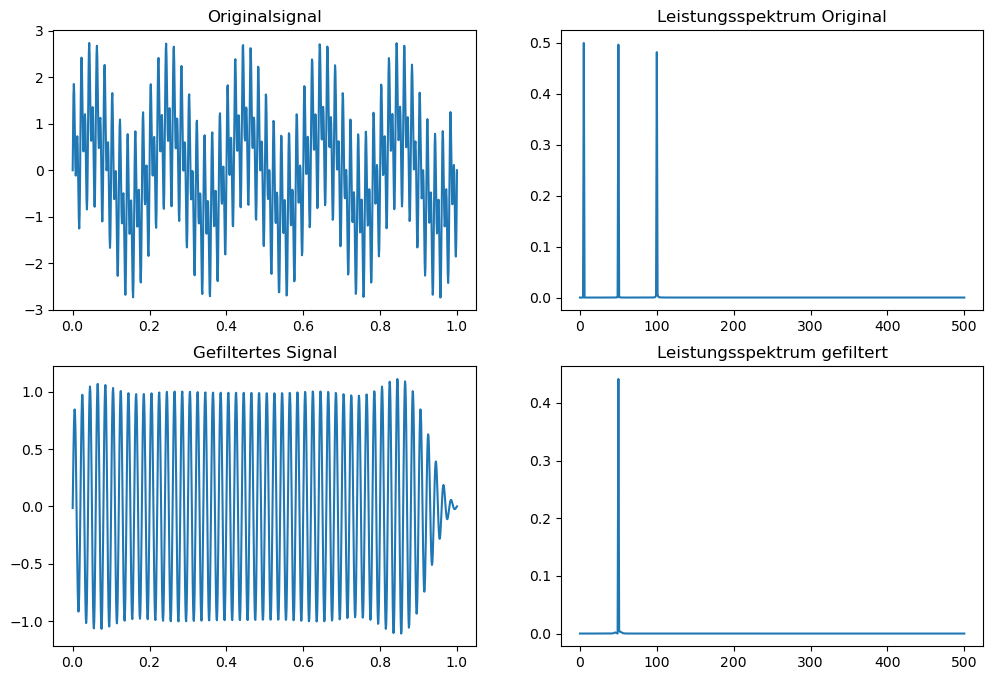

In [3]:
# Signalgenerierung
t = np.linspace(0, 1, 1000)
f1, f2, f3 = 5, 50, 100
signal_orig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Spektralanalyse
f, Pxx = signal.periodogram(signal_orig, fs=1000)

# Bandpassfilter
b, a = signal.butter(4, [45, 55], 'bandpass', fs=1000)
signal_gefiltert = signal.filtfilt(b, a, signal_orig)

# Spektrum des gefilterten Signals
f_filt, Pxx_filt = signal.periodogram(signal_gefiltert, fs=1000)

# Figure zum Vergleich
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(t, signal_orig)
plt.title('Originalsignal')
plt.subplot(222)
plt.plot(f, Pxx)
plt.title('Leistungsspektrum Original')
plt.subplot(223)
plt.plot(t, signal_gefiltert)
plt.title('Gefiltertes Signal')
plt.subplot(224)
plt.plot(f_filt, Pxx_filt)
plt.title('Leistungsspektrum gefiltert');

## 2 Lineare Algebra

Das Modul `scipy.linalg` erweitert die Funktionalität von `numpy.linalg` um fortgeschrittene Operationen der linearen Algebra. <br>

```python
# Beispiel: Lösen eines linearen Gleichungssystems
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

# Lösung mit verschiedenen Methoden
x_solve = linalg.solve(A, b)
x_lu = linalg.lu_solve(linalg.lu_factor(A), b)
```

#### 2.1 Aufgaben:
> (a) Berechne die Eigenwerte und Eigenvektoren einer beliebigen 3x3 Matrix (z.B.: `A = np.array([[4, -2, 1], [-2, 3, -1], [1, -1, 2]])`) mit `linalg.eig()`. <br>
>
> (b) Führe eine QR-Zerlegung einer Matrix mit`linalg.qr()` durch und verifiziere das Ergebnis. <br>
>
> (c) Löse ein überbestimmtes Gleichungssystem mit der Methode der kleinsten Quadrate mit `linalg.lstsq()`. <br>


In [4]:
from scipy import linalg
# Deine Lösung:





#### Lösung:

In [5]:
# Aufgabe a: Eigenwerte und Eigenvektoren
A = np.array([[4, -2, 1], [-2, 3, -1], [1, -1, 2]])
eigvals, eigvecs = linalg.eig(A)
print("Eigenwerte:", eigvals)
print("Eigenvektoren:\n", eigvecs)

# Aufgabe b: QR-Zerlegung
Q, R = linalg.qr(A)
print("\nQR-Zerlegung Verifikation:")
print("||QR - A|| =", np.linalg.norm(Q @ R - A))

# Aufgabe c: Überbestimmtes System
m, n = 5, 3
X = np.random.rand(m, n)
y = np.random.rand(m)
beta, residuals, rank, s = linalg.lstsq(X, y)
print("\nLösung kleinste Quadrate:", beta)


Eigenwerte: [6.04891734+0.j 1.64310413+0.j 1.30797853+0.j]
Eigenvektoren:
 [[ 0.73697623 -0.59100905  0.32798528]
 [-0.59100905 -0.32798528  0.73697623]
 [ 0.32798528  0.73697623  0.59100905]]

QR-Zerlegung Verifikation:
||QR - A|| = 1.137640067256873e-15

Lösung kleinste Quadrate: [-0.11172682  0.97981003  0.25938439]


## 3 Statistische Berechnungen

Das Modul `scipy.stats` bietet eine große Auswahl an Wahrscheinlichkeitsverteilungen und statistischen Tests. <br>

```python
from scipy import stats
import numpy as np

# Beispiel: Anpassung einer Normalverteilung
daten = np.random.normal(loc=10, scale=2, size=1000)
mittelwert, std = stats.norm.fit(daten)
```

#### 3.1 Aufgaben:
> (a) Führe einen Kolmogorov-Smirnov-Test durch, um zu prüfen, ob die Werte in `daten` normalverteilt sind. <br>
>
> (b) Berechne ein Konfidenzintervall für den Mittelwert einer Stichprobe. <br>
>
> (c) Führe einen t-Test für zwei unabhängige Stichproben durch. <br>
>
> (d) Berechne die Pearson-Korrelation zwischen zwei Variablen und teste ihre Signifikanz.

In [6]:
from scipy import stats
daten = np.random.normal(loc=0, scale=1, size=100)
# Deine Lösung:





#### Lösung:

In [7]:
# Aufgabe a: Kolmogorov-Smirnov-Test
daten = np.random.normal(loc=0, scale=1, size=100)
ks_statistik, p_wert = stats.kstest(daten, 'norm')
print("KS-Test p-Wert:", p_wert)
print(ks_statistik)

# Aufgabe b: Konfidenzintervall
mittelwert = np.mean(daten)
conf_interval = stats.t.interval(confidence=0.95, df=len(daten)-1,
                               loc=mittelwert,
                               scale=stats.sem(daten))
print("\nKonfidenzintervall:", conf_interval)

# Aufgabe c: t-Test
gruppe1 = np.random.normal(loc=0, scale=1, size=50)
gruppe2 = np.random.normal(loc=0.5, scale=1, size=50)
t_stat, p_wert = stats.ttest_ind(gruppe1, gruppe2)
print("\nt-Test p-Wert:", p_wert)

# Aufgabe d: Pearson-Korrelation
x = np.random.normal(0, 1, 100)
y = 2*x + np.random.normal(0, 0.5, 100)
r, p_wert = stats.pearsonr(x, y)
print("\nPearson r:", r)
print("Korrelation p-Wert:", p_wert)

KS-Test p-Wert: 0.6290768728045208
0.07329238756583312

Konfidenzintervall: (np.float64(-0.1463045090295133), np.float64(0.22032582465563577))

t-Test p-Wert: 0.02009756545016429

Pearson r: 0.9659543783094358
Korrelation p-Wert: 2.3771252288932274e-59


## 4 Mehrdimensionale Bildverarbeitung

Das Modul `scipy.ndimage` bietet Funktionen zur mehrdimensionalen Bildverarbeitung. <br>

```python
from scipy import ndimage
import numpy as np

# Beispiel: Gauß-Filter auf einem Bild
bild = np.random.rand(100, 100)
bild_gefiltert = ndimage.gaussian_filter(bild, sigma=2)
```

#### 4.1 Aufgaben:
> (a) Wende verschiedene Kantendetektionsfilter (Sobel, Prewitt) auf ein Bild an und vergleiche die Ergebnisse. <br>
>
> (b) Implementiere eine Bildsegmentierung mittels Schwellwertverfahren und morphologischer Operationen. <br>
>
> (c) Führe eine Bildrotation mit verschiedenen Interpolationsmethoden durch und vergleiche die Qualität. <br>
>
> (d) Entferne Rauschen aus einem Bild mit verschiedenen Filtern (Median, Gauß) und vergleiche die Ergebnisse.
>
> (e) Plotte die Ergebnisse in einem Matplotlib Graph.

In [8]:
# Deine Lösung:





#### Lösung:

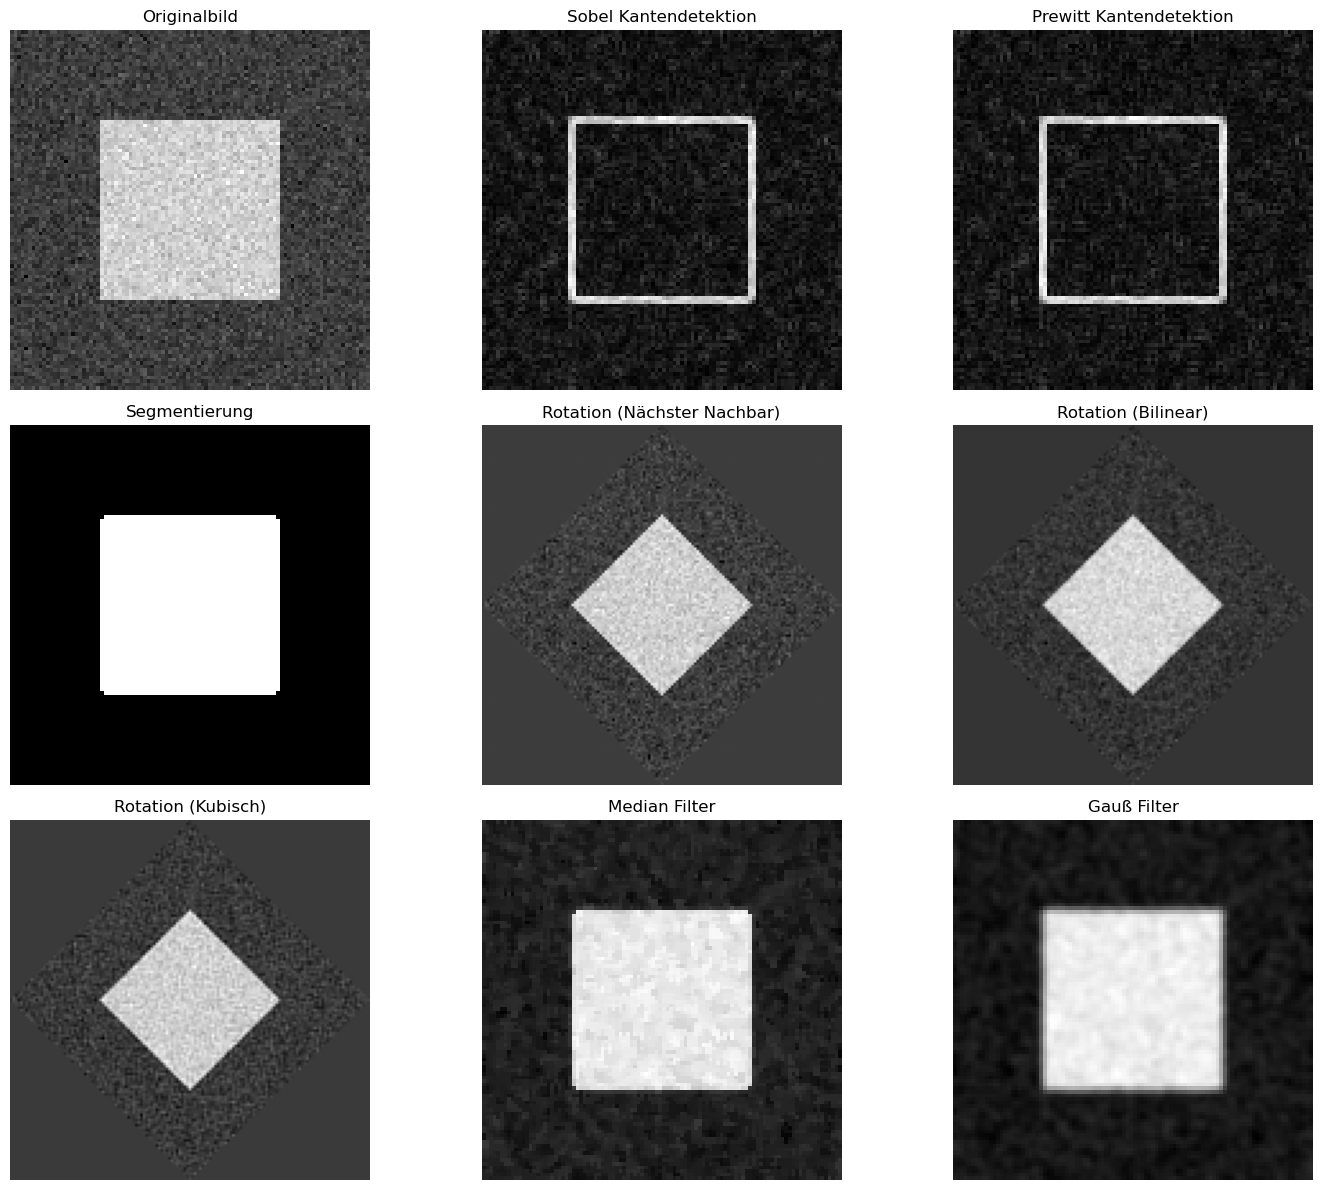

In [9]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

# Testbild erstellen
bild = np.zeros((100, 100))
bild[25:75, 25:75] = 1
bild = bild + np.random.normal(0, 0.1, bild.shape)

# Aufgabe a: Kantendetektion
sobel_x = ndimage.sobel(bild, axis=0)
sobel_y = ndimage.sobel(bild, axis=1)
kanten_sobel = np.hypot(sobel_x, sobel_y)
prewitt_x = ndimage.prewitt(bild, axis=0)
prewitt_y = ndimage.prewitt(bild, axis=1)
kanten_prewitt = np.hypot(prewitt_x, prewitt_y)

# Aufgabe b: Segmentierung
schwellwert = 0.5
maske = bild > schwellwert
maske = ndimage.binary_opening(maske)
maske = ndimage.binary_closing(maske)

# Aufgabe c: Rotation
winkel = 45
rot_nearest = ndimage.rotate(bild, winkel, order=0)  # Nächster Nachbar
rot_bilinear = ndimage.rotate(bild, winkel, order=1)  # Bilineare Interpolation
rot_cubic = ndimage.rotate(bild, winkel, order=3)     # Kubische Interpolation

# Aufgabe d: Rauschentfernung
median_gefiltert = ndimage.median_filter(bild, size=3)
gauss_gefiltert = ndimage.gaussian_filter(bild, sigma=1)

# Visualisierung
plt.figure(figsize=(15, 12))

# Original image
plt.subplot(331)
plt.imshow(bild, cmap='gray')
plt.title('Originalbild')
plt.axis('off')

# Edge detection
plt.subplot(332)
plt.imshow(kanten_sobel, cmap='gray')
plt.title('Sobel Kantendetektion')
plt.axis('off')

plt.subplot(333)
plt.imshow(kanten_prewitt, cmap='gray')
plt.title('Prewitt Kantendetektion')
plt.axis('off')

# Segmentation
plt.subplot(334)
plt.imshow(maske, cmap='gray')
plt.title('Segmentierung')
plt.axis('off')

# Rotation
plt.subplot(335)
plt.imshow(rot_nearest, cmap='gray')
plt.title('Rotation (Nächster Nachbar)')
plt.axis('off')

plt.subplot(336)
plt.imshow(rot_bilinear, cmap='gray')
plt.title('Rotation (Bilinear)')
plt.axis('off')

plt.subplot(337)
plt.imshow(rot_cubic, cmap='gray')
plt.title('Rotation (Kubisch)')
plt.axis('off')

# Noise removal
plt.subplot(338)
plt.imshow(median_gefiltert, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(339)
plt.imshow(gauss_gefiltert, cmap='gray')
plt.title('Gauß Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

## Fazit:

SciPy bietet eine umfangreiche Sammlung von Werkzeugen für fortgeschrittene wissenschaftliche Berechnungen: <br>

- Die Signalverarbeitung ermöglicht komplexe Filteroperationen und Frequenzanalysen <br>
- Die lineare Algebra-Funktionen sind optimiert für numerische Stabilität <br>
- Die statistischen Funktionen decken die meisten gängigen Tests und Verteilungen ab <br>
- Die Bildverarbeitung unterstützt mehrdimensionale Arrays mit verschiedenen Filteroperationen <br>

In der Praxis werden diese Funktionen oft kombiniert, um komplexe wissenschaftliche Probleme zu lösen. <br>